In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('/content/IMDB Dataset.csv', delimiter="\t")
df

,"review,sentiment"
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [4]:
#seperating review and sentiment column
df = pd.read_csv('/content/IMDB Dataset.csv',encoding="latin-1")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
from bs4 import BeautifulSoup
#removing html strips
def strip_html(text):
    soup = BeautifulSoup(text,'html.parser')
    return soup.get_text()

In [6]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [14]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [15]:
#removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

In [16]:
#removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [17]:
# Using apply function applying on review column
df['review']=df['review'].apply(denoise_text)

<ipython-input-5-195c6c5f6504>:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [18]:
df  # now the review column is perfectly clean

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [19]:
df.shape

(50000, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

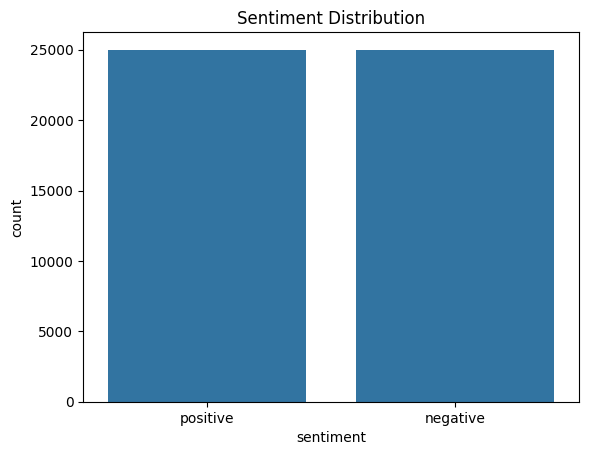

In [22]:
sns.countplot(x='sentiment',data = df)
plt.title('Sentiment Distribution')

In [23]:
df.sentiment.replace('positive',1, inplace = True)

df.sentiment.replace("negative", 0, inplace=True)

In [24]:
df.head()  # sentiment column convverted into 1 and 0

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [25]:
duplicated_count = df.duplicated().sum()
print('Duplicated count :' , duplicated_count)

Duplicated count : 419


In [26]:
df = df.drop_duplicates('review')

**For Positive Reviews**

In [27]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1


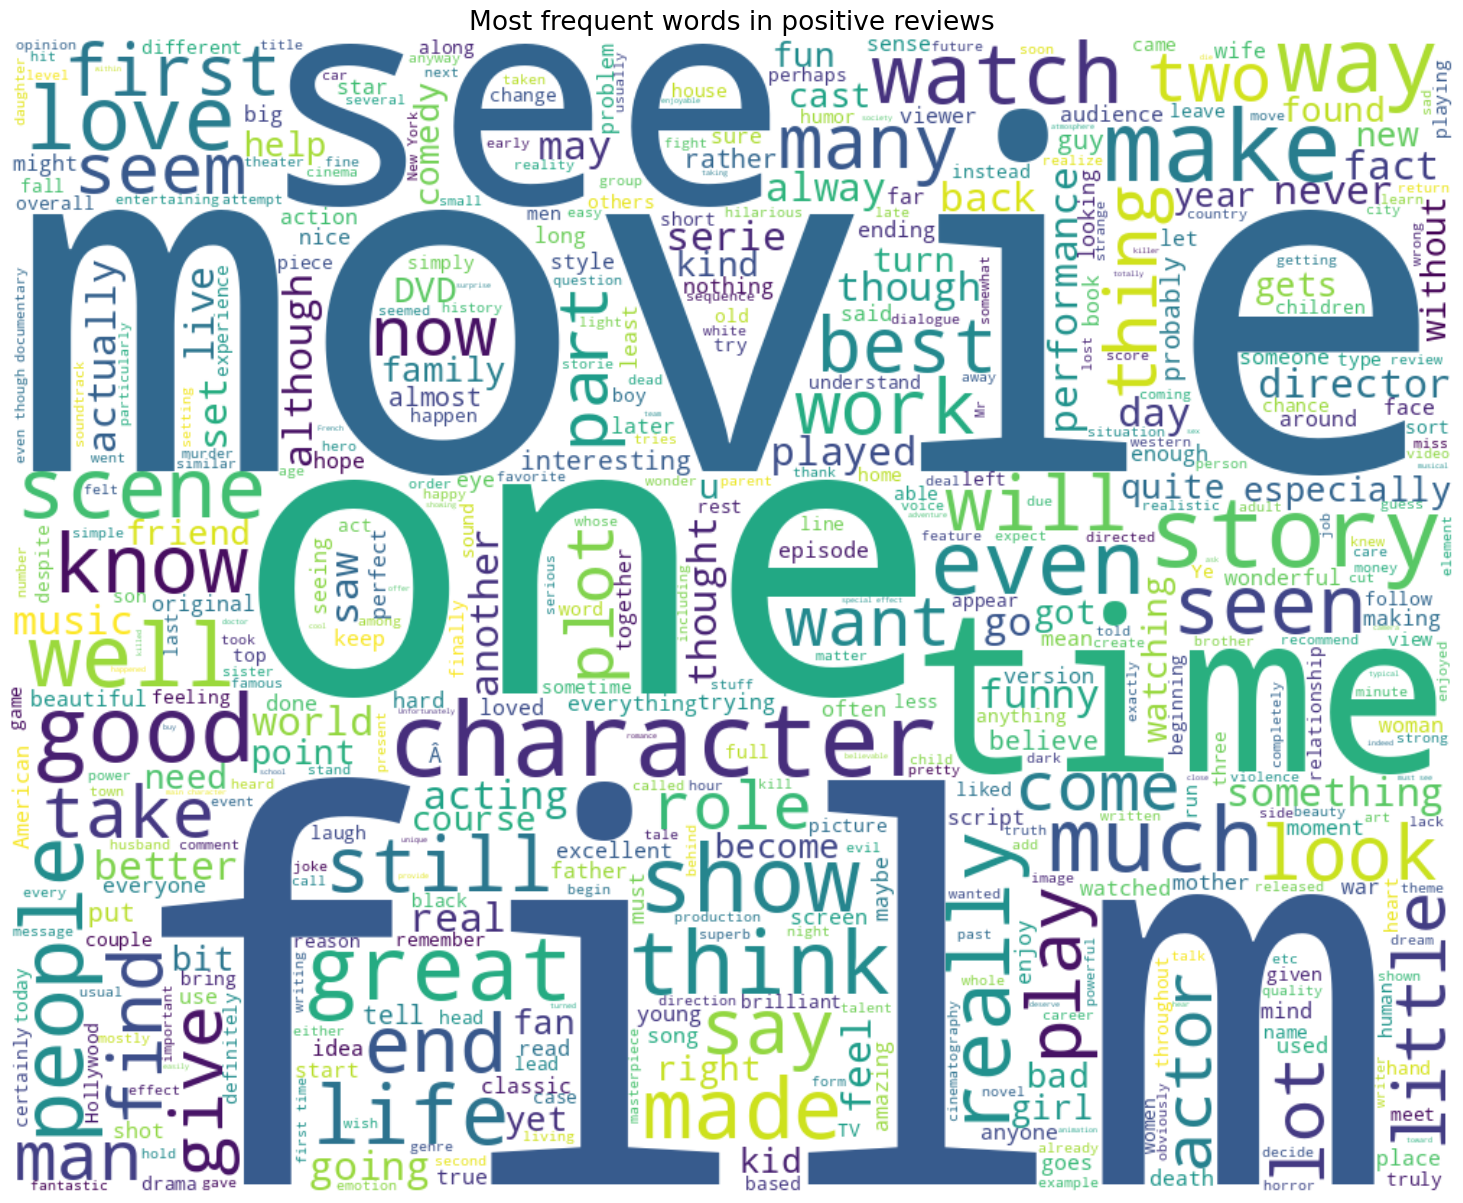

In [34]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15)) # facecolor='None')
wordcloud = WordCloud(max_words=500, width=1000, height=800,background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [36]:
from collections import Counter
count= Counter()
for text in pos_reviews['review'].values:
       for word in text.split():
          count[word]+=1
count.most_common(10)

[('the', 290913),
 ('and', 165369),
 ('a', 155241),
 ('of', 148656),
 ('to', 127907),
 ('is', 107824),
 ('in', 90139),
 ('I', 62355),
 ('that', 62179),
 ('it', 53152)]

In [37]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,the,290913
1,and,165369
2,a,155241
3,of,148656
4,to,127907


In [38]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

**For Negative Reviews**

In [39]:
neg_reviews= df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment
3,Basically there's a family where a little boy ...,0
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
10,Phil the Alien is one of those quirky films wh...,0
11,I saw this movie when I was about 12 when it c...,0


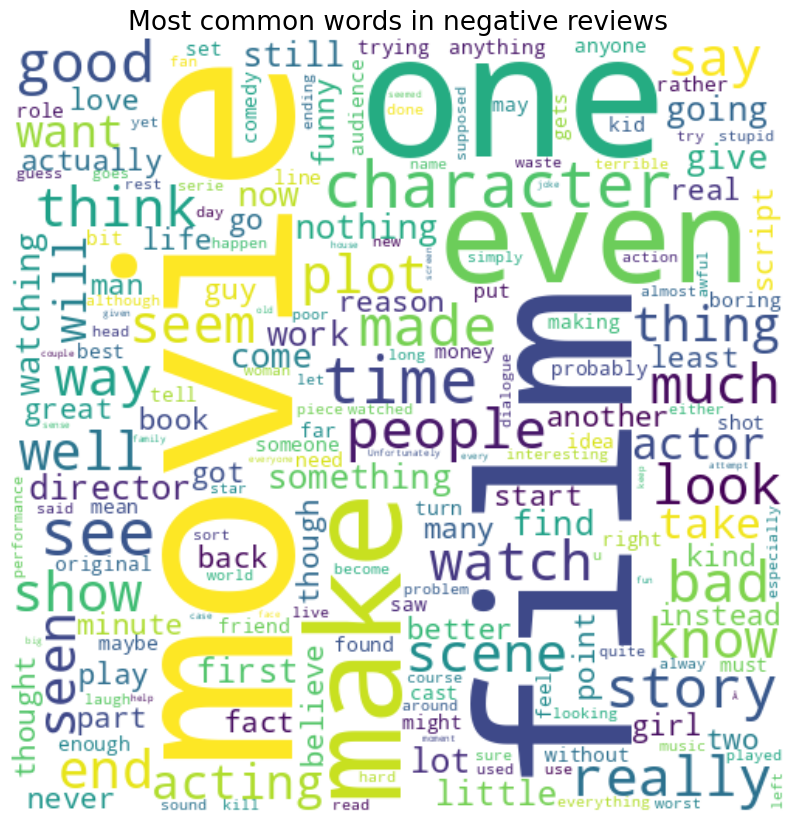

In [44]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(10,15))
wordcloud = WordCloud(max_words =200,width =500,height = 500,background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative reviews',fontsize=19)
plt.show()

In [45]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('the', 273535),
 ('a', 149556),
 ('and', 134388),
 ('of', 132917),
 ('to', 131969),
 ('is', 93836),
 ('in', 78583),
 ('I', 69864),
 ('that', 63680),
 ('this', 61408),
 ('it', 53948),
 ('was', 49966),
 ('for', 39367),
 ('with', 38791),
 ('as', 36099)]

In [46]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,the,273535
1,a,149556
2,and,134388
3,of,132917
4,to,131969


In [47]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

**Splitting Dataset**

In [48]:
X = df['review']
Y = df['sentiment']


In [49]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [51]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34706, 105298)
Size of y_train:  (34706,)
Size of x_test:  (14875, 105298)
Size of y_test:  (14875,)


In [52]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [58]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 105298)
Size of y_train:  (2000,)
Size of x_test:  (500, 105298)
Size of y_test:  (500,)


In [59]:
x_train = x_train.toarray()  # imprtant to convert into array
x_test = x_test.toarray()

In [54]:
from keras.models import Sequential
from keras.layers import Dense

**Model with rmsprop optimizer**

In [60]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10) # iteration-1 with 10 epochs accuracy 99.95%

Epoch 1/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6544 - accuracy: 0.7170
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 0.4566 - accuracy: 0.9060
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2394 - accuracy: 0.9505
Epoch 4/10
200/200 [==============================] - 5s 24ms/step - loss: 0.1150 - accuracy: 0.9755
Epoch 5/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0560 - accuracy: 0.9885
Epoch 6/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0269 - accuracy: 0.9950
Epoch 7/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0125 - accuracy: 0.9970
Epoch 8/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0056 - accuracy: 0.9995
Epoch 9/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 10/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0010 - accura

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                1684784   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1684929 (6.43 MB)
Trainable params: 1684929 (6.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 13ms/step - loss: 0.5112 - accuracy: 0.8400
Test loss: 0.5111678242683411
Test accuracy: 0.8399999737739563


**Optimer = Adam**

In [65]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
200/200 [==============================] - 5s 20ms/step - loss: 0.6390 - accuracy: 0.6825
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 0.2805 - accuracy: 0.9525
Epoch 3/10
200/200 [==============================] - 5s 24ms/step - loss: 0.0578 - accuracy: 0.9950
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 6/10
200/200 [==============================] - 5s 25ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
200/200 [==============================] - 4s 20ms/step - loss: 9.4580e-04 - accuracy: 1.0000
Epoch 9/10
200/200 [==============================] - 8s 38ms/step - loss: 6.1654e-04 - accuracy: 1.0000
Epoch 10/10
200/200 [==============================] - 8s 40ms/step - loss: 4.2591e

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                1684784   
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1684929 (6.43 MB)
Trainable params: 1684929 (6.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 10ms/step - loss: 0.4453 - accuracy: 0.8360
Test loss: 0.44532468914985657
Test accuracy: 0.8360000252723694
